# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import datetime as dt
import pandas as pd
pd.set_option("max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 12/26/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 12/26/20 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2359,38928341,6.1
Albania,7225,2877800,251.1
Algeria,5755,43851043,13.1
Andorra,468,77265,605.7
Angola,961,32866268,2.9
Antigua and Barbuda,7,97928,7.1
Argentina,80107,45195777,177.2
Armenia,9024,2963234,304.5
Australia,271,25459700,1.1


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Lithuania,35830,2722291,1316.2
Liechtenstein,486,38137,1274.4
San Marino,299,33938,881.0
Slovenia,17870,2078932,859.6
Panama,35717,4314768,827.8
Czechia,88490,10708982,826.3
Netherlands,141340,17134873,824.9
US,2648273,329466283,803.8
Montenegro,4901,628062,780.3


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

12/22/20    1570371.0
12/23/20    1604129.0
12/24/20    1630596.0
12/25/20    1632736.0
12/26/20    1646240.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

12/13/20        NaN
12/14/20     6451.0
12/15/20    33825.0
12/16/20    32744.0
12/17/20    30179.0
12/18/20    32830.0
12/19/20    21679.0
12/20/20     6444.0
12/21/20    19256.0
12/22/20    36153.0
12/23/20    33758.0
12/24/20    26467.0
12/25/20     2140.0
12/26/20    13504.0
Name: Germany, dtype: float64

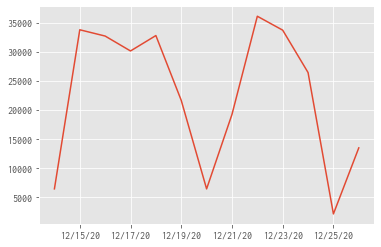

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83783945.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

352.60932151141844